<h1 style="color:red;text-align:center;font-size:50px">Ejemplo VaR histórico</h1>

# 📖 **Introducción** 
<p>El Valor en Riesgo (VaR) es una métrica financiera utilizada para estimar la posible pérdida en el valor de una inversión o cartera durante un período de tiempo determinado, con un nivel de confianza específico. Proporciona una medida probabilística de la peor pérdida esperada bajo condiciones normales de mercado.</p>

# 🎯 **Objetivo**  

El objetivo de este análisis es determinar el **Valor en Riesgo (VaR) al 95% de confianza** de un portafolio con una inversión de **$300,000,000 COP**, distribuida de la siguiente manera:  

📌 **55% en acciones de Ecopetrol**.  
📌 **45% en acciones de Celsia**.  

Para ello, utilizaremos el método **histórico**, el cual se basa en la distribución de pérdidas y ganancias observadas en el pasado, sin asumir una distribución específica de los rendimientos.  

✅ Con este enfoque, estimaremos la **máxima pérdida esperada en condiciones normales de mercado**.  


# 📊 **Metodología**

Para calcular el **Valor en Riesgo (VaR) histórico** del portafolio, seguimos los siguientes pasos:

### 1️⃣ **Obtención de datos**  
📥 Descargamos los precios históricos de cierre reales de las acciones de **Ecopetrol** y **Celsia** desde *Yahoo Finance*.

### 2️⃣ **Cálculo de retornos diarios**  
📈 Calculamos los rendimientos diarios de cada acción utilizando la variación porcentual entre precios consecutivos.

### 3️⃣ **Construcción del portafolio**  
⚖️ Asignamos pesos del **55% para Ecopetrol** y **45% para Celsia**, reflejando la distribución de inversión en el portafolio.

### 4️⃣ **Estimación de ganancias y pérdidas**  
📊 Calculamos la **variación diaria** en el valor del portafolio combinando los retornos de ambas acciones según sus pesos.

### 5️⃣ **Cálculo del VaR histórico**  
📉 Determinamos el **percentil 5%** de la distribución de ganancias y pérdidas, lo que nos permite conocer la **pérdida máxima esperada con un 95% de confianza**.

### 6️⃣ **Visualización de resultados**  
📌 Graficamos un **histograma de ganancias y pérdidas** y resaltamos la zona donde el VaR es superado, para una mejor interpretación del riesgo.

---



# 🚀 Ejecución


## 1️⃣ **Obtención de datos** 

In [1]:
import yfinance as yf 

**yfinance**: Es una API que permite obtener datos financieros reales desde *Yahoo Finance*, incluyendo precios de acciones, volúmenes y otros indicadores.  

In [2]:
"""
* Se crean objetos Ticker para las acciones de Ecopetrol y Celsia en la Bolsa de Valores de Colombia.
* Se descargan los datos históricos de precios para un año, concretamente entre el 11 de marzo de 2024 y el 11 de marzo de 2025.
"""
dat_ec = yf.Ticker("ECOPETROL.CL") 
dat_cl = yf.Ticker("CELSIA.CL") 

datos_ecopetrol = dat_ec.history(start="2024-03-11",end="2025-03-12")
datos_celsia = dat_cl.history(start="2024-03-11",end="2025-03-12")

In [3]:
datos_ecopetrol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,1917.201751,1940.582261,1889.145140,1926.553955,7513846,0.0,0.0
2024-03-12 00:00:00-04:00,1926.553849,1954.610458,1917.201645,1940.582153,4786471,0.0,0.0
2024-03-13 00:00:00-04:00,1963.962584,1977.990888,1945.258179,1945.258179,3251229,0.0,0.0
2024-03-14 00:00:00-04:00,1949.934523,1982.667236,1935.906217,1982.667236,7189970,0.0,0.0
2024-03-15 00:00:00-04:00,1982.667085,2066.836914,1968.638780,2066.836914,46520253,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,1885.000000,1945.000000,1885.000000,1930.000000,8718919,0.0,0.0
2025-03-06 00:00:00-05:00,1930.000000,2015.000000,1925.000000,2000.000000,9321401,0.0,0.0
2025-03-07 00:00:00-05:00,2000.000000,2060.000000,2000.000000,2060.000000,7431758,0.0,0.0



### ☝️ **Descripción de la Tabla**  

Esta tabla presenta los 5 valores más antiguos y los 5 más recientes dentro del período seleccionado para **Ecopetrol**.  

Además, en la parte inferior se indica que el conjunto de datos contiene **251 registros** distribuidos en **7 columnas**, correspondientes a la información histórica de Ecopetrol.  

---



In [4]:
datos_celsia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,3609.913917,3619.158255,3582.180904,3605.291748,153741,0.0,0.0
2024-03-12 00:00:00-04:00,3619.158255,3642.269099,3572.936566,3605.291748,191639,0.0,0.0
2024-03-13 00:00:00-04:00,3596.047316,3596.047316,3586.802979,3586.802979,122083,0.0,0.0
2024-03-14 00:00:00-04:00,3586.803134,3586.803134,3545.203613,3545.203613,165578,0.0,0.0
2024-03-15 00:00:00-04:00,3549.825536,3577.558548,3235.518066,3235.518066,3558941,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,3725.000000,3740.000000,3700.000000,3730.000000,461001,0.0,0.0
2025-03-06 00:00:00-05:00,3730.000000,3740.000000,3710.000000,3730.000000,405306,0.0,0.0
2025-03-07 00:00:00-05:00,3730.000000,3765.000000,3725.000000,3760.000000,643821,0.0,0.0



#### ☝️ **Descripción de la Tabla**  

Esta tabla presenta los 5 valores más antiguos y los 5 más recientes dentro del período seleccionado para **Celsia**.  

Además, en la parte inferior se indica que el conjunto de datos contiene **251 registros** distribuidos en **7 columnas**, correspondientes a la información histórica de Ecopetrol.  

---

In [5]:
"""
📌 **Selección de Datos**  
Se extraen únicamente los datos del precio de cierre de las acciones de Celsia y Ecopetrol
ya que es la información necesaria para calcular el VaR del portafolio.  
"""

accion_ecopetrol = datos_ecopetrol[['Close']].copy() #metodo copy() para evitar generar cambios en el dataframe original
accion_celsia = datos_celsia[['Close']].copy()

## 2️⃣ **Cálculo de retornos diarios**  

El **retorno diario** mide la variación porcentual en el precio de cierre de una acción respecto al día anterior. Se calcula utilizando la siguiente fórmula:  

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Donde:  
- $R_t$: es el retorno del día \( t \).  
- $P_t$: es el precio de cierre en el día \( t \).  
- $P_{t-1}$: es el precio de cierre en el día \( t-1 \).  


In [6]:
"""  
Las siguientes líneas de código calculan el retorno diario de las acciones de Ecopetrol y Celsia,  
usando la variación porcentual entre el precio de cierre actual y el del día anterior.  
"""  

accion_ecopetrol['Retorno_diario'] = (accion_ecopetrol['Close'] - accion_ecopetrol['Close'].shift(1))/accion_ecopetrol['Close'].shift(1)
accion_celsia['Retorno_diario'] = (accion_celsia['Close'] - accion_celsia['Close'].shift(1))/accion_celsia['Close'].shift(1)

## 3️⃣ **Construcción del portafolio** 

In [7]:
"""  
Se combinan los datos de Ecopetrol y Celsia en un DataFrame y se reemplazan los valores NaN con 0 para evitar errores.  
Estos valores NaN aparecen porque, al ser el 11 de marzo nuestro punto inicial, no es posible calcular la variación  
porcentual respecto al día anterior.  
"""  

portafolio = accion_ecopetrol.join(accion_celsia, lsuffix="_Ecopetrol",rsuffix="_Celsia")
portafolio.fillna(0,inplace=True)


In [8]:
portafolio

,Close_Ecopetrol,Retorno_diario_Ecopetrol,Close_Celsia,Retorno_diario_Celsia
Date,,,,
2024-03-11 00:00:00-04:00,1926.553955,0.000000,3605.291748,0.000000
2024-03-12 00:00:00-04:00,1940.582153,0.007281,3605.291748,0.000000
2024-03-13 00:00:00-04:00,1945.258179,0.002410,3586.802979,-0.005128
2024-03-14 00:00:00-04:00,1982.667236,0.019231,3545.203613,-0.011598
2024-03-15 00:00:00-04:00,2066.836914,0.042453,3235.518066,-0.087353
...,...,...,...,...
2025-03-05 00:00:00-05:00,1930.000000,0.023873,3730.000000,0.001342
2025-03-06 00:00:00-05:00,2000.000000,0.036269,3730.000000,0.000000
2025-03-07 00:00:00-05:00,2060.000000,0.030000,3760.000000,0.008043


#### ☝️ **Descripción de la Tabla**  

Esta tabla es el **DataFrame** combinado del precio de cierre de las acciones de Celsia y Ecopetro asi como sus **retornos diarios**.  

## 4️⃣ **Estimación de ganancias y pérdidas**  
Nuestro portafolio está compuesto por un 55% de acciones de Ecopetrol y un 45% de acciones de Celsia, con un valor total de $300.000.000 COP.  

Para calcular la ganancia o pérdida, utilizamos la siguiente fórmula:  

$$
\text{Retorno} = \text{valor\_portafolio} \times \left( (\text{peso}_{Ecopetrol} \times R_{Ecopetrol}) + (\text{peso}_{Celsia} \times R_{Celsia}) \right)
$$

A continuación, calculamos la ganancia o pérdida del portafolio considerando la distribución de la inversión en Celsia y Ecopetrol. 👇  


In [9]:
valor_portafolio = 300000000 
peso_Ecopetrol = 0.55
peso_Celsia = 0.45 

In [10]:
portafolio['ganancia_perdida'] = round(valor_portafolio*(peso_Ecopetrol*portafolio['Retorno_diario_Ecopetrol'] + peso_Celsia*portafolio['Retorno_diario_Celsia']),2)

In [11]:
portafolio['ganancia_perdida']

Date
2024-03-11 00:00:00-04:00          0.00
2024-03-12 00:00:00-04:00    1201447.12
2024-03-13 00:00:00-04:00    -294727.32
2024-03-14 00:00:00-04:00    1607381.97
2024-03-15 00:00:00-04:00   -4788003.53
                                ...    
2025-03-05 00:00:00-05:00    4120200.10
2025-03-06 00:00:00-05:00    5984455.96
2025-03-07 00:00:00-05:00    6035790.88
2025-03-10 00:00:00-04:00   -3701004.44
2025-03-11 00:00:00-04:00   -4931726.91
Name: ganancia_perdida, Length: 251, dtype: float64

#### ☝️ **Descripción de la Tabla**  

Esta tabla representa el **DataFrame** de las **retornos** del portafolio.

---


## 5️⃣ **Cálculo del VaR histórico**  
Si definimos un intervalo de confianza del 95%, el Valor en Riesgo (VaR) se ubicará en el percentil correspondiente a \( 1 - 0.95 = 0.05 \), es decir, en el cuantil del 5%.

In [12]:
VaR = portafolio['ganancia_perdida'].quantile(0.05) #Obtiene el cuantil del 5%


In [13]:
print("VaR = ${:,.2f}".format(VaR))

VaR = $-5,872,563.83


#### ☝️ El **VaR** obtenido indica que existe un 5% de probabilidad de que el portafolio sufra pérdidas de al menos **$5,872,568.25 COP**.


## 6️⃣ **Visualización de resultados**  

A continuación, se grafica el histograma de las ganancias y pérdidas del portafolio durante el período de tiempo analizado.  

En la gráfica, el cuantil del 5% se resalta en **naranja**, representando todas las pérdidas de al menos **$5,872,568.25 COP** sufridas por el portafolio.  


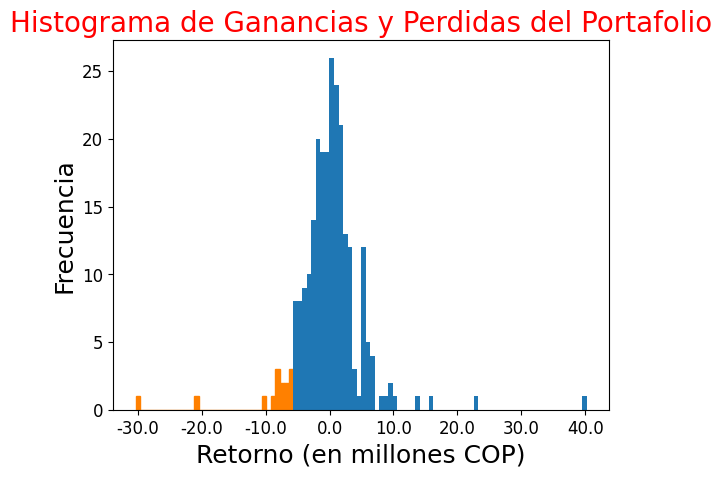

In [14]:

histograma = portafolio['ganancia_perdida'].plot(kind='hist',bins= 100,fontsize=12)
for rect in histograma.patches:
    if rect.get_x() <= VaR:
        rect.set_color('#FF8000')
        
histograma.set_ylabel('Frecuencia',fontsize=18)
histograma.set_xlabel('Retorno (en millones COP)', fontsize=18)
histograma.set_title('Histograma de Ganancias y Perdidas del Portafolio',fontsize=20,color='red')
histograma.xaxis.set_major_formatter(lambda x, pos: str(x/1000000))

## 7️⃣ **Conclusiones**  

El histograma generado a partir de los rendimientos diarios del portafolio muestra cierta similitud con una distribución normal. Esta característica es fundamental, ya que diversos métodos para el cálculo del valor en riesgo asumen una distribución normal de las probabilidades.  


In [15]:
portafolio['ganancia_perdida'].describe().round(2)

count         251.00
mean       109522.71
std       5255628.33
min     -30336322.87
25%      -2124591.26
50%             0.00
75%       1841576.79
max      40191561.16
Name: ganancia_perdida, dtype: float64

## ☝️ 

El histograma generado a partir de los rendimientos diarios del portafolio muestra cierta similitud con una distribución normal. Esta característica es fundamental, ya que otros métodos para el cálculo del valor en riesgo asumen una distribución normal de las probabilidades.  

Además, observamos que el retorno promedio diario del portafolio es de **\$109,522.69 COP**. Sin embargo, la volatilidad es considerablemente alta, ya que su desviación estándar es de **\$5,872,568.25 COP**, lo que equivale aproximadamente a **53 veces el retorno diario promedio**.  

Asimismo, la pérdida máxima registrada (correspondiente al valor mínimo de los retornos diarios en el **DataFrame**) es de **\$30,336,322.87 COP**. Este dato es relevante, ya que destaca la importancia de recordar que el *Valor en Riesgo (VaR)* representa la probabilidad de enfrentar pérdidas de al menos el valor calculado del VaR, pero las pérdidas podrían ser mucho mayores.  

